In [1]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\IBRAHIM\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Feb  3 12:34:55 2026).


In [2]:
#filter for the job titles and country
df_us = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [6]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [10]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [13]:
 job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

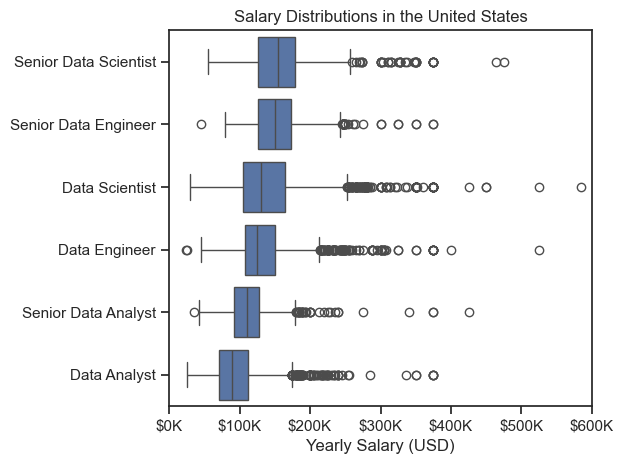

In [15]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', orient='h', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.ylabel('')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()

In [16]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [17]:
df_da_us['salary_year_avg']

36       NaN
68       NaN
73       NaN
79       NaN
93       NaN
          ..
785603   NaN
785626   NaN
785685   NaN
785703   NaN
785705   NaN
Name: salary_year_avg, Length: 67816, dtype: float64

In [21]:
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])
df_da_us['salary_year_avg'].sample(10)


458043     81000.0
185005     69000.0
229230    125000.0
491150    101540.0
604734    115000.0
761910    115791.5
607861     90000.0
295679    110200.0
14306     132500.0
493387    125000.0
Name: salary_year_avg, dtype: float64

In [22]:
df_da_us = df_da_us.explode('job_skills')
df_da_us['job_skills']
df_da_us[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [23]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(
    count='count',
    median='median'
)
df_da_us_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [24]:
df_da_top_pay = df_da_us_group.sort_values('median', ascending=False).head(10)
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [37]:
df_da_top_pay = df_da_us_group.sort_values('median', ascending=False).head(10)
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(
    count='count',
    median='median'
).sort_values('count', ascending=False).head(10)
df_da_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


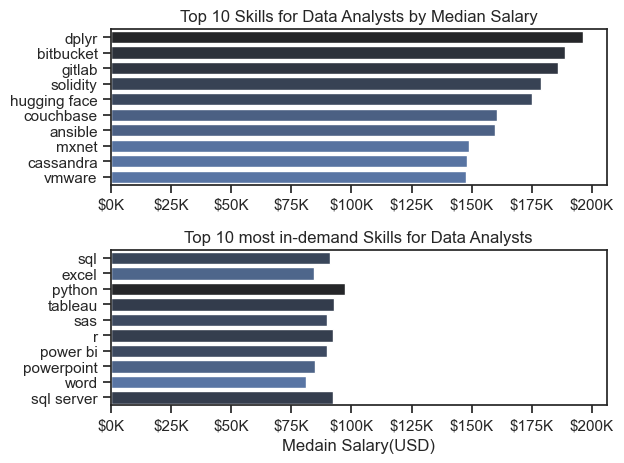

In [40]:
import seaborn as sns

fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")
sns.barplot(data=df_da_top_pay, y=df_da_top_pay.index, x='median', ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
# df_da_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Skills for Data Analysts by Median Salary')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}K'))

sns.barplot(data=df_da_skills, y=df_da_skills.index, x='median', ax=ax[1], hue='median', palette='dark:b_r')
ax[1].legend().remove()
# df_da_skills.plot(kind='barh', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_title('Top 10 most in-demand Skills for Data Analysts')
ax[1].set_xlabel('Medain Salary(USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}K'))
#plt.tight_layout()
fig.tight_layout()
plt.show()
# df_da_top_pay['median'].plot(kind='barh', ax=x[0], title='Top 10 Skills for Data Analysts by Median Salary')
# df_da_skills['count'].plot(kind='barh', ax=x[1], title='Top 10 Skills for Data Analysts by Count of Job Postings')